In [103]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [104]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (2).json


{'kaggle.json': b'{"username":"maiabdelhameed","key":"c4a347c86c0e74bccd8ea77f5a8b8edb"}'}

In [105]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [106]:
!kaggle datasets download -d arkhoshghalb/twitter-sentiment-analysis-hatred-speech

twitter-sentiment-analysis-hatred-speech.zip: Skipping, found more recently modified local copy (use --force to force download)


In [107]:
!ls

 files		    sample_data
'kaggle (1).json'   sentiment.hdf5
'kaggle (2).json'   twitter-sentiment-analysis-hatred-speech.zip
 kaggle.json


In [108]:
import zipfile
zip_ref = zipfile.ZipFile('/content/twitter-sentiment-analysis-hatred-speech.zip', 'r')
zip_ref.extractall('files')
zip_ref.close()

In [109]:
import numpy as np
import pandas as pd

In [110]:
train_data = pd.read_csv(r"/content/files/train.csv")
test_data = pd.read_csv(r"/content/files/test.csv")

In [111]:
train_data.head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...


In [112]:
print(train_data.isnull().sum())

id       0
label    0
tweet    0
dtype: int64


In [113]:
tweets = train_data['tweet'].tolist()
labels = train_data['label'].values

In [114]:
print(tweets[:10])

[' @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run', "@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked", '  bihday your majesty', '#model   i love u take with u all the time in urð\x9f\x93±!!! ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91\x85ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦  ', ' factsguide: society now    #motivation', '[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo  ', ' @user camping tomorrow @user @user @user @user @user @user @user dannyâ\x80¦', "the next school year is the year for exams.ð\x9f\x98¯ can't think about that ð\x9f\x98\xad #school #exams   #hate #imagine #actorslife #revolutionschool #girl", 'we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers  â\x80¦ ', " @user @user welcome here !  i'm   it's so #gr8 ! "]


In [115]:
print(np.unique(labels))

[0 1]


In [116]:
print('Positive Tweets: {}'.format((train_data['label']==0).sum()))
print('Negative Tweets: {}'.format((train_data['label']==1).sum()))

Positive Tweets: 29720
Negative Tweets: 2242


In [117]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

lem = WordNetLemmatizer()

nltk.download('wordnet')
nltk.download('stopwords')
nltk.download("words")   # needed for the english_words

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [118]:
stop_words = set(stopwords.words('english'))
english_words = set(nltk.corpus.words.words())

nltk.download('omw-1.4')


[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [119]:
def preprocessing(text):
  text=text.lower()
  new_text=""
  for word in text.split():
        if word in english_words and word not in stop_words and word.isalpha():
            new_text = new_text + " " + word
   
  new_text = new_text.replace('.', ' <PERIOD> ')
  new_text = new_text.replace(',', ' <COMMA> ')
  new_text = new_text.replace('"', ' <QUOTATION_MARK> ')
  new_text = new_text.replace(';', ' <SEMICOLON> ')
  new_text = new_text.replace('!', ' <EXCLAMATION_MARK> ')
  new_text = new_text.replace('?', ' <QUESTION_MARK> ')
  new_text = new_text.replace('(', ' <LEFT_PAREN> ')
  new_text = new_text.replace(')', ' <RIGHT_PAREN> ')
  new_text = new_text.replace('--', ' <HYPHENS> ')
  new_text = new_text.replace('?', ' <QUESTION_MARK> ')
  new_text = new_text.replace('#', ' ')

  lem_text = ""
  for word in new_text.split():
      lem_text = lem_text + " " + lem.lemmatize(word)

  return lem_text


In [120]:
data = []
for sent in range(len(tweets)):
    x = preprocessing(tweets[sent])
    if len(x.split()) > 3:
      data.append(x)
  

In [121]:
data

[' thanks credit use cause offer',
 ' love u take u time',
 ' huge fan fare big talking chaos pay get',
 ' next school year year think',
 ' consumer price index previous may',
 ' around via make people',
 ' people blaming ha conceded goal fat gave away free kick knowing bale hit',
 ' product happy man tool time open drink',
 ' great panel mediatization public service',
 ' people went good night people lost forever',
 ' never chance vote presidential candidate excited cycle',
 ' rip fellow fan away forever singing cheering fire',
 ' hard due cloudy oxygen production',
 ' unbelievable century need something like',
 ' bull dominate bull direct whatever want w',
 ' finally finish book working',
 ' fan easier fan roll around',
 ' love u take u time',
 ' best pa life knowing',
 ' scourge baroque piano beyond belief',
 ' wife adore miss show name',
 ' celebrate every man fatherly',
 ' white establishment running around loving greatness',
 ' much stuff happening first shooting two year old',
 

In [122]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


tokens = Tokenizer(oov_token='<OOV>')
tokens.fit_on_texts(data)

words_index = tokens.word_index
words_index

{'<OOV>': 1,
 'u': 2,
 'day': 3,
 'time': 4,
 'love': 5,
 'like': 6,
 'get': 7,
 'new': 8,
 'take': 9,
 'people': 10,
 'bull': 11,
 'want': 12,
 'one': 13,
 'happy': 14,
 'see': 15,
 'need': 16,
 'good': 17,
 'go': 18,
 'got': 19,
 'today': 20,
 'way': 21,
 'make': 22,
 'going': 23,
 'really': 24,
 'first': 25,
 'life': 26,
 'think': 27,
 'never': 28,
 'know': 29,
 'even': 30,
 'come': 31,
 'great': 32,
 'back': 33,
 'best': 34,
 'last': 35,
 'find': 36,
 'much': 37,
 'next': 38,
 'wait': 39,
 'bear': 40,
 'feel': 41,
 'still': 42,
 'polar': 43,
 'whatever': 44,
 'would': 45,
 'finally': 46,
 'week': 47,
 'many': 48,
 'looking': 49,
 'old': 50,
 'work': 51,
 'climb': 52,
 'every': 53,
 'always': 54,
 'sad': 55,
 'look': 56,
 'direct': 57,
 'world': 58,
 'dominate': 59,
 'year': 60,
 'tomorrow': 61,
 'getting': 62,
 'another': 63,
 'little': 64,
 'night': 65,
 'right': 66,
 'may': 67,
 'stop': 68,
 'someone': 69,
 'say': 70,
 'bing': 71,
 'found': 72,
 'bong': 73,
 'thank': 74,
 'n': 75

In [123]:
data_num = tokens.texts_to_sequences(data)
data_num

[[113, 1265, 187, 280, 778],
 [5, 2, 9, 2, 4],
 [397, 429, 2957, 110, 369, 1992, 149, 7],
 [38, 151, 60, 60, 27],
 [1156, 749, 814, 387, 67],
 [79, 84, 22, 10],
 [10, 1382, 1547, 4011, 1383, 815, 348, 156, 99, 919, 496, 4012, 335],
 [569, 14, 76, 1157, 4, 214, 609],
 [32, 1731, 4013, 520, 336],
 [10, 206, 17, 65, 10, 137, 497],
 [28, 521, 430, 920, 1074, 144, 2375],
 [570, 1384, 429, 156, 497, 610, 2958, 650],
 [158, 337, 1548, 4014, 1158],
 [1732, 1993, 16, 111, 6],
 [11, 59, 11, 57, 44, 12, 317],
 [46, 498, 270, 219],
 [429, 997, 429, 1266, 79],
 [5, 2, 9, 2, 4],
 [34, 181, 26, 496],
 [4015, 4016, 1385, 611, 2376],
 [612, 4017, 164, 80, 338],
 [651, 53, 76, 2959],
 [93, 2377, 499, 79, 349, 1386],
 [37, 370, 500, 25, 207, 120, 60, 50],
 [2378, 522, 816, 322],
 [102, 2379, 369, 338],
 [1994, 613, 779, 4018],
 [1387, 239, 9, 239, 323, 68, 88, 1549, 7],
 [240, 156, 178, 125],
 [87, 4019, 130, 8, 176, 8, 56],
 [65, 46, 7, 15, 2380],
 [479, 2381, 1733, 33],
 [480, 1995, 652, 79, 259, 2382,

In [124]:
data_padded = pad_sequences(data_num, padding='post')

data_padded = np.array(data_padded)
print(data_padded.shape)
data_padded

(12537, 15)


array([[ 113, 1265,  187, ...,    0,    0,    0],
       [   5,    2,    9, ...,    0,    0,    0],
       [ 397,  429, 2957, ...,    0,    0,    0],
       ...,
       [2021,   61,   39, ...,    0,    0,    0],
       [  15, 3383,  185, ...,    0,    0,    0],
       [ 454,   55,  100, ...,    0,    0,    0]], dtype=int32)

In [125]:
vocab_size = max(list(tokens.word_index.values()))+1
out_size = 300
lstm_size = 64

In [134]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dropout, Dense

model = Sequential()
model.add(Embedding(vocab_size, out_size))
model.add(Dropout(0.5))
model.add(LSTM(lstm_size, dropout=0.5, recurrent_dropout=0.2))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])
model.summary()


Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_18 (Embedding)    (None, None, 300)         2006700   
                                                                 
 dropout_51 (Dropout)        (None, None, 300)         0         
                                                                 
 lstm_35 (LSTM)              (None, 64)                93440     
                                                                 
 dropout_52 (Dropout)        (None, 64)                0         
                                                                 
 dense_16 (Dense)            (None, 1)                 65        
                                                                 
Total params: 2,100,205
Trainable params: 2,100,205
Non-trainable params: 0
_________________________________________________________________


In [135]:
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

early = EarlyStopping(monitor='val_loss', patience=5, mode="min", restore_best_weights=True, verbose=1)

checkpointer = ModelCheckpoint(filepath='sentiment.hdf5', verbose=1, save_best_only=True)

reduce_learning_rate = ReduceLROnPlateau(monitor='val_loss', patience=3, verbose=1, factor=0.5, min_lr=0.00001)


In [136]:
history = model.fit(data_padded, labels, epochs=50, batch_size=200, validation_split=0.2, verbose=1, 
                    callbacks=[checkpointer, reduce_learning_rate, early])

Epoch 1/50
51/51 [==============================] - ETA: 0s - loss: 0.3187 - accuracy: 0.9197
Epoch 1: val_loss improved from inf to 0.25871, saving model to sentiment.hdf5
51/51 [==============================] - 13s 186ms/step - loss: 0.3187 - accuracy: 0.9197 - val_loss: 0.2587 - val_accuracy: 0.9286 - lr: 0.0010
Epoch 2/50
51/51 [==============================] - ETA: 0s - loss: 0.2610 - accuracy: 0.9303
Epoch 2: val_loss improved from 0.25871 to 0.25830, saving model to sentiment.hdf5
51/51 [==============================] - 10s 201ms/step - loss: 0.2610 - accuracy: 0.9303 - val_loss: 0.2583 - val_accuracy: 0.9286 - lr: 0.0010
Epoch 3/50
51/51 [==============================] - ETA: 0s - loss: 0.2597 - accuracy: 0.9303
Epoch 3: val_loss did not improve from 0.25830
51/51 [==============================] - 9s 185ms/step - loss: 0.2597 - accuracy: 0.9303 - val_loss: 0.2588 - val_accuracy: 0.9286 - lr: 0.0010
Epoch 4/50
51/51 [==============================] - ETA: 0s - loss: 0.2548 

In [137]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()


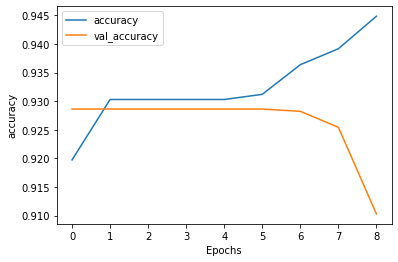

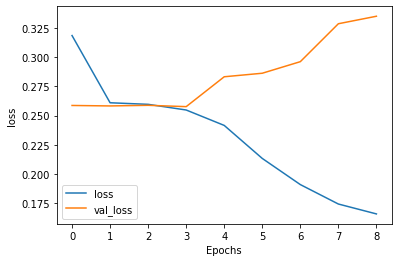

In [138]:
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")